## Deep Neural Networks (DNNs) with PyTorch

- Datasets in the lesson are available through: [https://www.kaggle.com/datasets/yhzang32/2025-course-dl4pde](https://www.kaggle.com/datasets/yhzang32/2025-course-dl4pde)


## (1) Creating a Neural Network with PyTorch

In PyTorch, neural networks are constructed using the ```torch.nn module```. A neural network is typically implemented as a class that inherits from ```nn.Module```. Within the class, we define:
- The architecture (layers) in ```__init__()```.
- The forward propagation logic in ```forward()```.
  
### (1.1) Defining a simple Fully Connected (Feedforward) Neural Network

**Key Notes:**
- ```nn.Linear(in_features, out_features)``` defines fully connected layers.
- ```F.relu()``` applies the ReLU activation function.
- The forward pass defines how data moves through the network.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a simple neural network with 2 hidden layers
class SimpleNN(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size, bias=True)  # First hidden layer
        self.fc2 = nn.Linear(hidden_size, hidden_size) # Second hidden layer
        self.fc3 = nn.Linear(hidden_size, output_size) # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x))  # Activation function for hidden layers
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # Output layer (no activation if regression)
        return x

# Create model instance
model = SimpleNN(input_size=10, hidden_size=20, output_size=1)
print(model)  # Prints the architecture

SimpleNN(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)


### (1.2) Defining DNN models with ```nn.Sequential()```

In [2]:
import torch
from torch import nn

class SelfNN(nn.Module):

    def __init__(self, arch: list, activation=nn.ReLU()):
        """
        arch: a list defining the layer sizes.
              Example: [1, 40, 40, 40, 40, 1]
              - arch[0] = input size
              - arch[-1] = output size
              - arch[1:-1] = sizes of hidden layers

        activation: the activation function used between layers (default: ReLU)
        """
        super(SelfNN, self).__init__()

        # Create an empty Sequential model that will hold all layers in order
        self.nn_model = nn.Sequential()

        # Start with the input dimension
        input_size = arch[0]

        # Build all hidden layers dynamically
        for hidden_size in arch[1:-1]:
            # Add a fully-connected layer: input_size → hidden_size
            self.nn_model.append(nn.Linear(input_size, hidden_size))
            # Add the chosen activation function
            self.nn_model.append(activation)
            # Update input_size to match the new layer's output size
            input_size = hidden_size

        # Add the final output layer (no activation)
        # Maps from last hidden layer size → final output size
        self.nn_model.append(nn.Linear(hidden_size, arch[-1]))

    def forward(self, x):
        """
        Forward pass through the network.

        Input:
            x: tensor of shape (batch_size, input_dim)
        Output:
            y: tensor of shape (batch_size, output_dim)
        """
        # Pass input through the entire Sequential model
        y = self.nn_model(x)
        return y

# Example: 1 input dimension, four hidden layers of size 40, and 1 output
model = SelfNN(arch=[1, 40, 40, 40, 40, 1], activation=nn.ReLU())
print(model)

SelfNN(
  (nn_model): Sequential(
    (0): Linear(in_features=1, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=40, bias=True)
    (5): ReLU()
    (6): Linear(in_features=40, out_features=40, bias=True)
    (7): ReLU()
    (8): Linear(in_features=40, out_features=1, bias=True)
  )
)


## (2) Initializing Model Parameters

Proper initialization of weights and biases is crucial for stable training. PyTorch initializes parameters automatically, but we can customize initialization.

#### Custom Weight Initialization

In [3]:
import torch.nn.init as init

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)  # Xavier initialization
        init.zeros_(m.bias)  # Set biases to zero

# Apply initialization to model
model.apply(initialize_weights)

SelfNN(
  (nn_model): Sequential(
    (0): Linear(in_features=1, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=40, bias=True)
    (5): ReLU()
    (6): Linear(in_features=40, out_features=40, bias=True)
    (7): ReLU()
    (8): Linear(in_features=40, out_features=1, bias=True)
  )
)

#### Other Initialization Methods
- ```init.kaiming_uniform_()``` for ReLU-based networks.
- ```init.normal_()``` for normal distribution initialization.
**Notes:**
  - Proper weight initialization prevents vanishing/exploding gradients.
  - The default initialization algorithm used in PyTorch uses a **Uniform Distribution** with the range depending on the size of the layer, with a formula that looks pretty similar to **Xavier initialization**.

## (3) Defining the Loss Function
The choice of loss function depends on the task:
- **Regression**: ```nn.MSELoss()``` (Mean Squared Error).
- **Binary Classification**: ```nn.BCELoss()``` (Binary Cross-Entropy).
- **Multi-Class Classification**: ```nn.CrossEntropyLoss()```.

#### Defining a Loss Function

In [4]:
import torch
import torch.nn as nn

criterion = nn.MSELoss()  # Suitable for regression problems

x = torch.rand((100,2))
x_ = torch.rand((100,2))
#print('x', x, 'x_', x_)

loss = criterion(x, x_)
print('loss:', loss)

loss: tensor(0.1650)


In [5]:
torch.mean((x-x_)**2)

tensor(0.1650)

## (4) Setting Up Optimizers and Training Parameters
PyTorch provides various optimization algorithms in ```torch.optim```, including:
- ```optim.SGD(model.parameters(), lr=0.01)``` – Stochastic Gradient Descent.
- ```optim.Adam(model.parameters(), lr=0.001)``` – Adam optimizer (adaptive learning rate).
- ```optim.RMSprop(model.parameters(), lr=0.01)``` – Root Mean Square Propagation.

#### Choosing an Optimizer

In [6]:
import torch.optim as optim

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**Note:** The learning rate (lr) is a key hyperparameter affecting convergence.

## (5) Training a DNN Model
The training loop involves:
- **Forward pass**: Compute predictions.
- **Compute loss**.
- **Backward pass**: Compute gradients via ```loss.backward()```.
- **Update weights** using ```optimizer.step()```.
- **Repeat** for multiple epochs.

The dataset regression_1d: <KeysViewHDF5 ['x_test', 'x_train', 'y_test', 'y_train']>


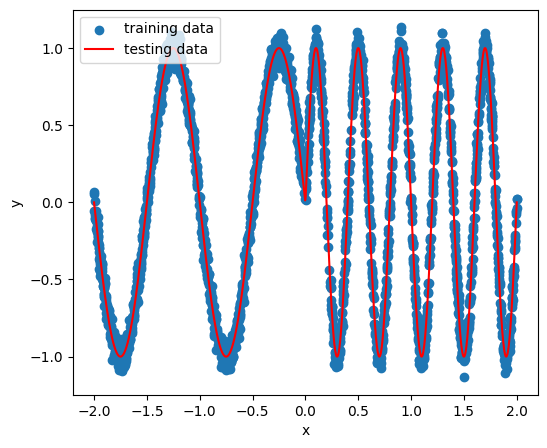

In [8]:
import h5py
import numpy as np
import torch
import matplotlib.pyplot as plt

with h5py.File('regression_1d.h5', 'r') as f:
    print('The dataset regression_1d:', f.keys())
    x_test = torch.tensor(np.array(f['x_test']))
    y_test = torch.tensor(np.array(f['y_test']))
    x_train = torch.tensor(np.array(f['x_train']))
    y_train = torch.tensor(np.array(f['y_train']))

plt.figure(figsize=(6, 5))
plt.scatter(x_train, y_train, label='training data')
plt.plot(x_test, y_test, color='r', label='testing data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

In [9]:
from torch import nn
import torch.optim as optim
import torch.nn.init as init
torch.manual_seed(1234)

class SelfNN(nn.Module):

    def __init__(self, arch: list, activation=nn.ReLU()):
        """
        arch: a list defining the layer sizes.
              Example: [1, 40, 40, 40, 40, 1]
              - arch[0] = input size
              - arch[-1] = output size
              - arch[1:-1] = sizes of hidden layers

        activation: the activation function used between layers (default: ReLU)
        """
        super(SelfNN, self).__init__()

        # Create an empty Sequential model that will hold all layers in order
        self.nn_model = nn.Sequential()

        # Start with the input dimension
        input_size = arch[0]

        # Build all hidden layers dynamically
        for hidden_size in arch[1:-1]:
            # Add a fully-connected layer: input_size → hidden_size
            self.nn_model.append(nn.Linear(input_size, hidden_size))
            # Add the chosen activation function
            self.nn_model.append(activation)
            # Update input_size to match the new layer's output size
            input_size = hidden_size

        # Add the final output layer (no activation)
        # Maps from last hidden layer size → final output size
        self.nn_model.append(nn.Linear(hidden_size, arch[-1]))

    def forward(self, x):
        """
        Forward pass through the network.

        Input:
            x: tensor of shape (batch_size, input_dim)
        Output:
            y: tensor of shape (batch_size, output_dim)
        """
        # Pass input through the entire Sequential model
        y = self.nn_model(x)
        return y

# Define model
model = SelfNN(arch=[1, 40, 40, 40, 40, 1], activation=nn.ReLU()).to("cpu")

# Apply initialization to model
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)  # Xavier initialization
        init.zeros_(m.bias)  # Set biases to zero
model.apply(initialize_weights)

# the loss function
criterion = nn.MSELoss()

# the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10000
loss_train = []
loss_test = []
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Clear previous gradients
    outputs = model(x_train.to("cpu"))  # Forward pass
    loss = criterion(outputs.to('cpu'), y_train.to('cpu'))  # Compute loss
    loss_train.append(loss.item())
    loss.backward()  # Backpropagation, compute gradients
    optimizer.step()  # Update weights

    with torch.no_grad():
        loss = criterion(model(x_test), y_test)
        loss_test.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss_train: {loss_train[-1]:.4f}, Loss_test: {loss_test[-1]:.4f}')

Epoch [100/10000], Loss_train: 0.3918, Loss_test: 0.3913
Epoch [200/10000], Loss_train: 0.2437, Loss_test: 0.2399
Epoch [300/10000], Loss_train: 0.2000, Loss_test: 0.1961
Epoch [400/10000], Loss_train: 0.1779, Loss_test: 0.1743
Epoch [500/10000], Loss_train: 0.1609, Loss_test: 0.1567
Epoch [600/10000], Loss_train: 0.1480, Loss_test: 0.1421
Epoch [700/10000], Loss_train: 0.1374, Loss_test: 0.1303
Epoch [800/10000], Loss_train: 0.1274, Loss_test: 0.1214
Epoch [900/10000], Loss_train: 0.1236, Loss_test: 0.1146
Epoch [1000/10000], Loss_train: 0.1140, Loss_test: 0.1069
Epoch [1100/10000], Loss_train: 0.1060, Loss_test: 0.1008
Epoch [1200/10000], Loss_train: 0.1014, Loss_test: 0.0960
Epoch [1300/10000], Loss_train: 0.0955, Loss_test: 0.0906
Epoch [1400/10000], Loss_train: 0.0924, Loss_test: 0.0872
Epoch [1500/10000], Loss_train: 0.0892, Loss_test: 0.0840
Epoch [1600/10000], Loss_train: 0.0852, Loss_test: 0.0808
Epoch [1700/10000], Loss_train: 0.0841, Loss_test: 0.0810
Epoch [1800/10000], Los

**Notes:**
- ```optimizer.zero_grad()``` clears old gradients to prevent accumulation.
- ```loss.backward()``` computes gradients using backpropagation.
- ```optimizer.step()``` updates parameters.

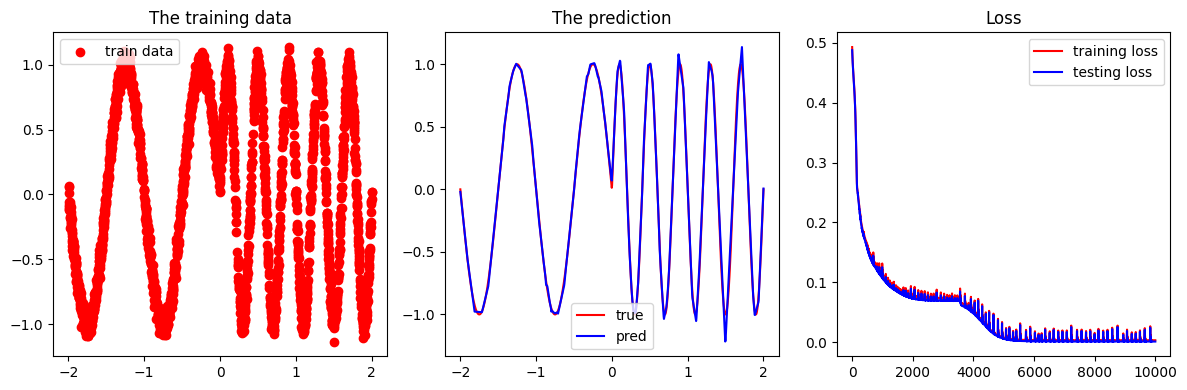

In [10]:
import matplotlib.pyplot as plt

y_pred = model(x_test).detach().numpy()
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# First subplot
axes[0].scatter(x_train, y_train, label="train data", color="r")
axes[0].set_title("The training data")
axes[0].legend()

# Second subplot
axes[1].plot(x_test, y_test, label="true", color="r")
axes[1].plot(x_test, y_pred, label="pred", color="b")
axes[1].set_title("The prediction")
axes[1].legend()

# Third subplot
axes[2].plot(loss_train, label="training loss", color="r")
axes[2].plot(loss_test, label="testing loss", color="b")
# axes[2].semilogy(loss_train, label="training loss", color="r")
# axes[2].semilogy(loss_test, label="testing loss", color="b")
axes[2].set_title("Loss")
axes[2].legend()
#
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

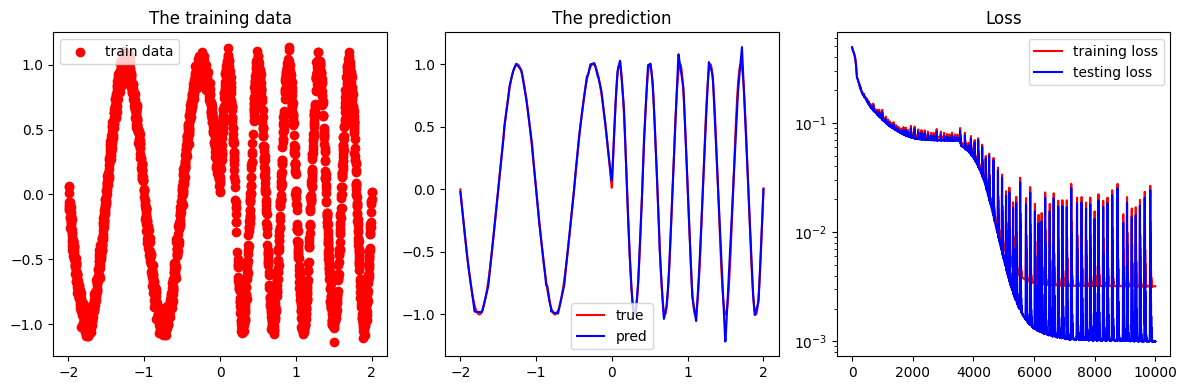

In [11]:
import matplotlib.pyplot as plt

y_pred = model(x_test).detach().numpy()
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# First subplot
axes[0].scatter(x_train, y_train, label="train data", color="r")
axes[0].set_title("The training data")
axes[0].legend()

# Second subplot
axes[1].plot(x_test, y_test, label="true", color="r")
axes[1].plot(x_test, y_pred, label="pred", color="b")
axes[1].set_title("The prediction")
axes[1].legend()

# Third subplot
# axes[2].plot(loss_train, label="training loss", color="r")
# axes[2].plot(loss_test, label="testing loss", color="b")
axes[2].semilogy(loss_train, label="training loss", color="r")
axes[2].semilogy(loss_test, label="testing loss", color="b")
axes[2].set_title("Loss")
axes[2].legend()
#
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## (6) Saving and Loading a Trained Model

### (6.1) Save only the trained parameters with ```state_dict```

In [12]:
torch.save(model.state_dict(), 'model_state.pth')  # Saves only model weights

#### Loading a Model for Testing

**Note:**  ```eval()``` disables dropout and batch normalization effects for inference.

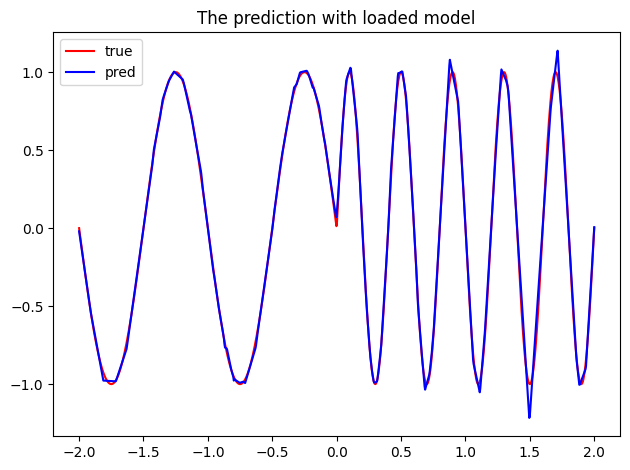

In [13]:
model_load = SelfNN(arch=[1, 40, 40, 40, 40, 1], activation=nn.ReLU())  # Recreate model
trained_param = torch.load('model_state.pth')
model_load.load_state_dict(trained_param)  # Load trained weights
model_load.eval()  # Set model to evaluation mode

y_pred = model_load(x_test).detach().numpy()

plt.figure()
plt.plot(x_test, y_test, label="true", color="r")
plt.plot(x_test, y_pred, label="pred", color="b")
plt.title("The prediction with loaded model")
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### (6.2) Saving both the model parameters and structure

In [14]:
torch.save(model, 'model_all.pth')

**load the model without specifying its structrue**

SelfNN(
  (nn_model): Sequential(
    (0): Linear(in_features=1, out_features=40, bias=True)
    (1): ReLU()
    (2): Linear(in_features=40, out_features=40, bias=True)
    (3): ReLU()
    (4): Linear(in_features=40, out_features=40, bias=True)
    (5): ReLU()
    (6): Linear(in_features=40, out_features=40, bias=True)
    (7): ReLU()
    (8): Linear(in_features=40, out_features=1, bias=True)
  )
)


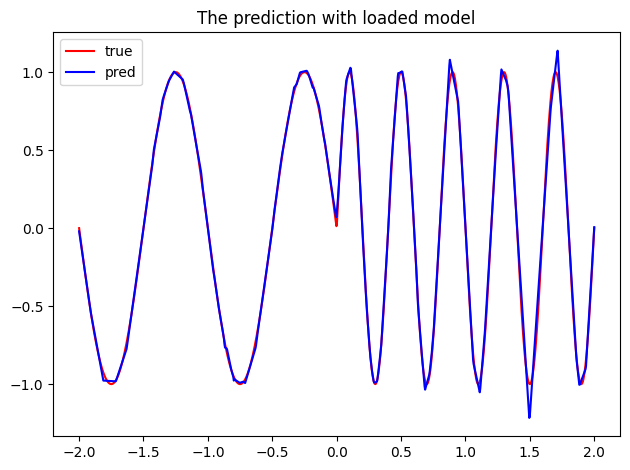

In [15]:
model_load = torch.load('model_all.pth', weights_only=False)
print(model_load)
model_load.eval()  # Set model to evaluation mode

y_pred = model_load(x_test).detach().numpy()

plt.figure()
plt.plot(x_test, y_test, label="true", color="r")
plt.plot(x_test, y_pred, label="pred", color="b")
plt.title("The prediction with loaded model")
plt.legend()
plt.tight_layout()
plt.show()

## (7) Additional Best Practices for Training DNNs

### (7.1) Use Mini-batch Training Instead of Full Dataset

Instead of using the full dataset at once, we use torch.utils.data.DataLoader to create batches.

In [16]:
import h5py
import numpy as np
import torch
import matplotlib.pyplot as plt

with h5py.File('regression_1d.h5', 'r') as f:
    x_test = torch.tensor(np.array(f['x_test']))
    y_test = torch.tensor(np.array(f['y_test']))
    x_train = torch.tensor(np.array(f['x_train']))
    y_train = torch.tensor(np.array(f['y_train']))

In [17]:
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):

    def __init__(self, x, y):
        self.x = x.reshape(-1, 1) # Makes column vectors in the shape (n_samples, n_features=1)
        self.y = y.reshape(-1, 1)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.x.shape[0]

dataloader = DataLoader(MyDataset(x_train, y_train), batch_size=100, shuffle=True)
print('The length of dataloader:', len(dataloader))

The length of dataloader: 25


In [18]:
from torch import nn
import torch.optim as optim
import torch.nn.init as init
torch.manual_seed(1234)

class SelfNN(nn.Module):

    def __init__(self, arch:list, activation=nn.ReLU()):
        super(SelfNN, self).__init__()

        self.nn_model = nn.Sequential()
        input_size = arch[0]

        for hidden_size in arch[1:-1]:
            self.nn_model.append(nn.Linear(input_size, hidden_size))
            self.nn_model.append(activation)
            input_size = hidden_size

        self.nn_model.append(nn.Linear(hidden_size, arch[-1]))

    def forward(self, x):
        '''
        Input:
            x: size(batch_size, x_size)
        Output:
            y: size(batch_size, out_size)
        '''
        y = self.nn_model(x)

        return y

# Define model
model = SelfNN(arch=[1, 40, 40, 40, 1], activation=nn.ReLU())

# Apply initialization to model
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        init.zeros_(m.bias)
model.apply(initialize_weights)

# the loss function
criterion = nn.MSELoss()

# the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5000
loss_train = []
loss_test = []
for epoch in range(num_epochs):
    loss_sum = 0.
    for batch_x, batch_y in dataloader: # training with batch (Once the loop finishes, the dataset will be read once in its entirety)
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss_sum += loss.item()
        loss.backward()
        optimizer.step()
    loss_train.append(loss_sum/len(dataloader))

    with torch.no_grad():
        loss = criterion(model(x_test), y_test)
        loss_test.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss_train: {loss_train[-1]:.4f}, Loss_test: {loss_test[-1]:.4f}')

Epoch [100/5000], Loss_train: 0.1574, Loss_test: 0.1599
Epoch [200/5000], Loss_train: 0.1247, Loss_test: 0.1145
Epoch [300/5000], Loss_train: 0.0217, Loss_test: 0.0197
Epoch [400/5000], Loss_train: 0.0173, Loss_test: 0.0153
Epoch [500/5000], Loss_train: 0.0150, Loss_test: 0.0130
Epoch [600/5000], Loss_train: 0.0124, Loss_test: 0.0081
Epoch [700/5000], Loss_train: 0.0072, Loss_test: 0.0045
Epoch [800/5000], Loss_train: 0.0057, Loss_test: 0.0033
Epoch [900/5000], Loss_train: 0.0046, Loss_test: 0.0019
Epoch [1000/5000], Loss_train: 0.0046, Loss_test: 0.0018
Epoch [1100/5000], Loss_train: 0.0063, Loss_test: 0.0038
Epoch [1200/5000], Loss_train: 0.0047, Loss_test: 0.0016
Epoch [1300/5000], Loss_train: 0.0043, Loss_test: 0.0022
Epoch [1400/5000], Loss_train: 0.0040, Loss_test: 0.0023
Epoch [1500/5000], Loss_train: 0.0040, Loss_test: 0.0016
Epoch [1600/5000], Loss_train: 0.0042, Loss_test: 0.0020
Epoch [1700/5000], Loss_train: 0.0055, Loss_test: 0.0058
Epoch [1800/5000], Loss_train: 0.0040, L

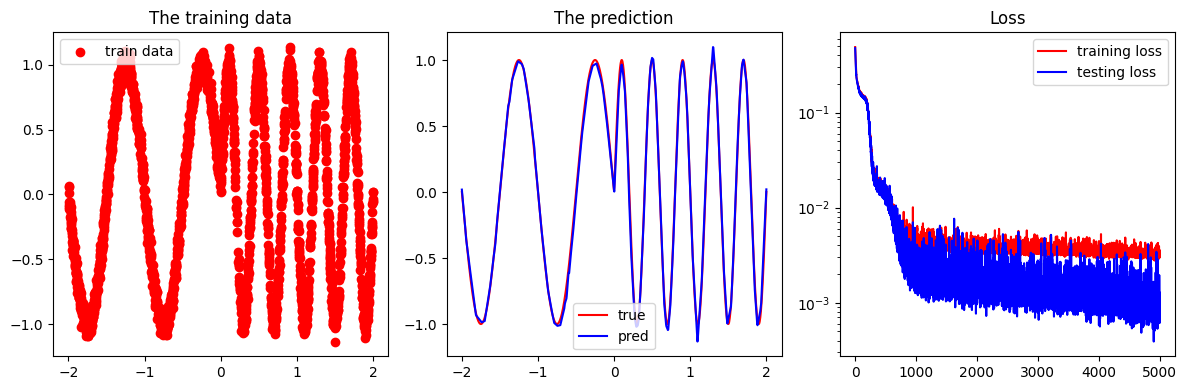

In [19]:
import matplotlib.pyplot as plt

y_pred = model(x_test).detach().numpy()
#
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# First subplot
axes[0].scatter(x_train, y_train, label="train data", color="r")
axes[0].set_title("The training data")
axes[0].legend()
#
# Second subplot
axes[1].plot(x_test, y_test, label="true", color="r")
axes[1].plot(x_test, y_pred, label="pred", color="b")
axes[1].set_title("The prediction")
axes[1].legend()
#
# Third subplot
axes[2].semilogy(loss_train, label="training loss", color="r")
axes[2].semilogy(loss_test, label="testing loss", color="b")
axes[2].set_title("Loss")
axes[2].legend()
plt.tight_layout()
plt.show()

### (7.2) Use Learning Rate Scheduling for Better Convergence

In [21]:
import h5py
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

with h5py.File('regression_1d.h5', 'r') as f:
    x_test = torch.tensor(np.array(f['x_test']))
    y_test = torch.tensor(np.array(f['y_test']))
    x_train = torch.tensor(np.array(f['x_train']))
    y_train = torch.tensor(np.array(f['y_train']))

In [22]:
from torch import nn
import torch.optim as optim
import torch.nn.init as init

torch.manual_seed(1234)

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        init.zeros_(m.bias)

class SelfNN(nn.Module):

    def __init__(self, arch:list, activation=nn.ReLU()):
        super(SelfNN, self).__init__()
        ##
        self.nn_model = nn.Sequential()
        input_size = arch[0]
        #
        for hidden_size in arch[1:-1]:
            self.nn_model.append(nn.Linear(input_size, hidden_size))
            self.nn_model.append(activation)
            input_size = hidden_size
        #
        self.nn_model.append(nn.Linear(hidden_size, arch[-1]))

    def forward(self, x):
        '''
        Input:
            x: size(batch_size, x_size)
        Output:
            y: size(batch_size, out_size)
        '''
        y = self.nn_model(x)

        return y

# Define model
model = SelfNN(arch=[1, 40, 40, 40, 40, 40, 40, 1], activation=nn.ReLU())

# Apply initialization to model
model.apply(initialize_weights)

# the loss function
criterion = nn.MSELoss()

# the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# the scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.5)

# Training loop
num_epochs = 5000
loss_train = []
loss_test = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    loss_train.append(loss.item())
    #
    scheduler.step()  # Adjust learning rate
    #
    with torch.no_grad():
        loss = criterion(model(x_test), y_test)
        loss_test.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss_train: {loss_train[-1]:.4f}, Loss_test: {loss_test[-1]:.4f}, lr: {scheduler.optimizer.param_groups[0]["lr"]}')

Epoch [100/5000], Loss_train: 0.2949, Loss_test: 0.2885, lr: 0.001
Epoch [200/5000], Loss_train: 0.1853, Loss_test: 0.1809, lr: 0.001
Epoch [300/5000], Loss_train: 0.1363, Loss_test: 0.1298, lr: 0.001
Epoch [400/5000], Loss_train: 0.0967, Loss_test: 0.0917, lr: 0.001
Epoch [500/5000], Loss_train: 0.0858, Loss_test: 0.0806, lr: 0.001
Epoch [600/5000], Loss_train: 0.0835, Loss_test: 0.0787, lr: 0.001
Epoch [700/5000], Loss_train: 0.0830, Loss_test: 0.0777, lr: 0.001
Epoch [800/5000], Loss_train: 0.0803, Loss_test: 0.0752, lr: 0.001
Epoch [900/5000], Loss_train: 0.0787, Loss_test: 0.0744, lr: 0.001
Epoch [1000/5000], Loss_train: 0.0771, Loss_test: 0.0732, lr: 0.0005
Epoch [1100/5000], Loss_train: 0.0761, Loss_test: 0.0717, lr: 0.0005
Epoch [1200/5000], Loss_train: 0.0750, Loss_test: 0.0707, lr: 0.0005
Epoch [1300/5000], Loss_train: 0.0736, Loss_test: 0.0694, lr: 0.0005
Epoch [1400/5000], Loss_train: 0.0718, Loss_test: 0.0677, lr: 0.0005
Epoch [1500/5000], Loss_train: 0.0693, Loss_test: 0.

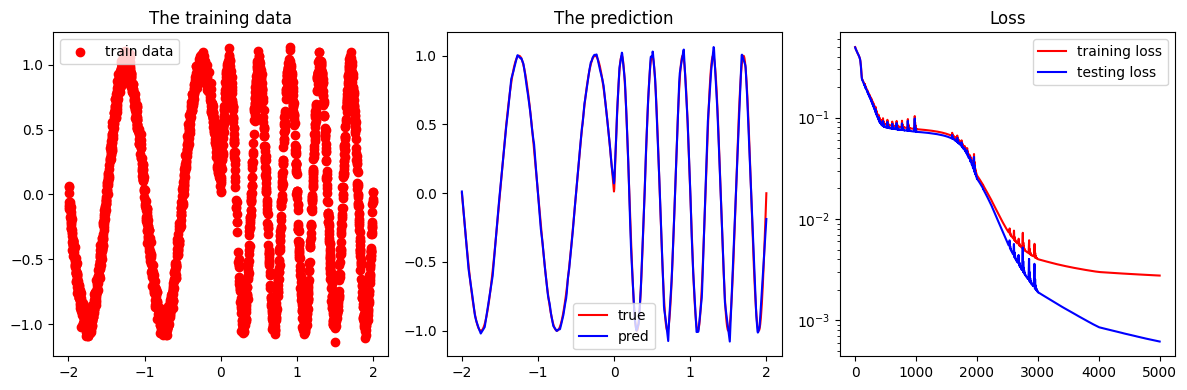

In [23]:
import matplotlib.pyplot as plt

y_pred = model(x_test).detach().numpy()
#
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# First subplot
axes[0].scatter(x_train, y_train, label="train data", color="r")
axes[0].set_title("The training data")
axes[0].legend()
#
# Second subplot
axes[1].plot(x_test, y_test, label="true", color="r")
axes[1].plot(x_test, y_pred, label="pred", color="b")
axes[1].set_title("The prediction")
axes[1].legend()
#
# Third subplot
axes[2].semilogy(loss_train, label="training loss", color="r")
axes[2].semilogy(loss_test, label="testing loss", color="b")
axes[2].set_title("Loss")
axes[2].legend()
plt.tight_layout()
plt.show()

### (7.3) Use Early Stopping to Prevent Overfitting

Instead of training for a fixed number of epochs, stop early if the validation loss stops improving.

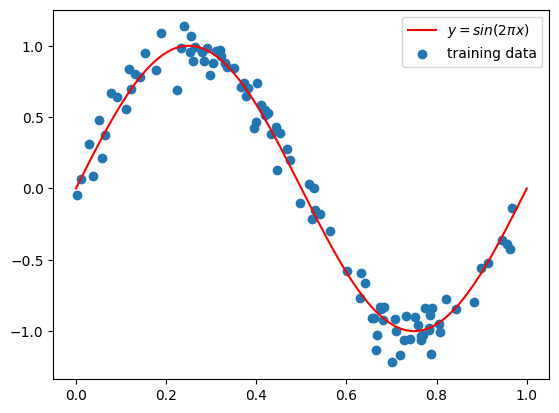

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
#
torch.manual_seed(1234)

# Sample training data
x_train = torch.rand(100, 1)  # 100 samples, 1 features
y_train = torch.sin(2. * torch.pi * x_train) + 0.1 * torch.randn(100, 1)   # 100 target values

# Sample testiing data
x_test = torch.linspace(0, 1, 1000).view(-1, 1)
y_test = torch.sin(2. * torch.pi * x_test)

#
plt.figure()
plt.plot(x_test, y_test, label=r'$y=sin(2\pi x)$', color='r')
plt.scatter(x_train, y_train, label=r'training data')
plt.legend()
plt.show()

In [25]:
from torch import nn
import torch.optim as optim
import torch.nn.init as init
#
torch.manual_seed(1234)

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        init.zeros_(m.bias)

class SelfNN(nn.Module):

    def __init__(self, arch:list, activation=nn.ReLU()):
        super(SelfNN, self).__init__()
        ##
        self.nn_model = nn.Sequential()
        input_size = arch[0]
        #
        for hidden_size in arch[1:-1]:
            self.nn_model.append(nn.Linear(input_size, hidden_size))
            self.nn_model.append(activation)
            input_size = hidden_size
        #
        self.nn_model.append(nn.Linear(hidden_size, arch[-1]))

    def forward(self, x):
        '''
        Input:
            x: size(batch_size, x_size)
        Output:
            y: size(batch_size, out_size)
        '''
        y = self.nn_model(x)

        return y

# Define model
model = SelfNN(arch=[1, 10, 10, 10, 1], activation=nn.ReLU())

# Apply initialization to model
model.apply(initialize_weights)

# the loss function
criterion = nn.MSELoss()

# the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5000
loss_train = []
loss_test = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    loss_train.append(loss.item())
    #
    with torch.no_grad():
        loss = criterion(model(x_test), y_test)
        loss_test.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss_train: {loss_train[-1]:.4f}, Loss_test: {loss_test[-1]:.4f}')

Epoch [100/5000], Loss_train: 0.3951, Loss_test: 0.3178
Epoch [200/5000], Loss_train: 0.1174, Loss_test: 0.1378
Epoch [300/5000], Loss_train: 0.0980, Loss_test: 0.1394
Epoch [400/5000], Loss_train: 0.0922, Loss_test: 0.1313
Epoch [500/5000], Loss_train: 0.0857, Loss_test: 0.1223
Epoch [600/5000], Loss_train: 0.0783, Loss_test: 0.1123
Epoch [700/5000], Loss_train: 0.0704, Loss_test: 0.1019
Epoch [800/5000], Loss_train: 0.0627, Loss_test: 0.0908
Epoch [900/5000], Loss_train: 0.0550, Loss_test: 0.0795
Epoch [1000/5000], Loss_train: 0.0475, Loss_test: 0.0677
Epoch [1100/5000], Loss_train: 0.0399, Loss_test: 0.0556
Epoch [1200/5000], Loss_train: 0.0320, Loss_test: 0.0425
Epoch [1300/5000], Loss_train: 0.0249, Loss_test: 0.0316
Epoch [1400/5000], Loss_train: 0.0200, Loss_test: 0.0219
Epoch [1500/5000], Loss_train: 0.0159, Loss_test: 0.0154
Epoch [1600/5000], Loss_train: 0.0133, Loss_test: 0.0103
Epoch [1700/5000], Loss_train: 0.0122, Loss_test: 0.0073
Epoch [1800/5000], Loss_train: 0.0113, L

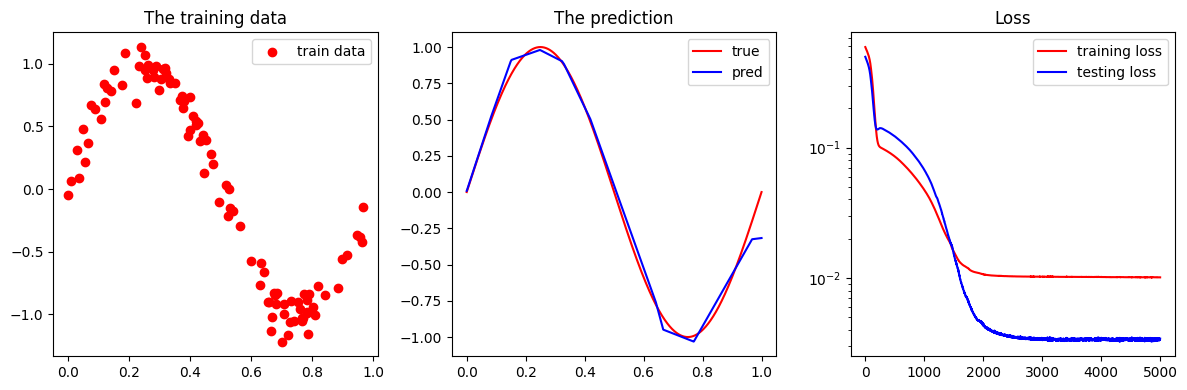

In [26]:
import matplotlib.pyplot as plt

y_pred = model(x_test).detach().numpy()
#
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# First subplot
axes[0].scatter(x_train, y_train, label="train data", color="r")
axes[0].set_title("The training data")
axes[0].legend()
#
# Second subplot
axes[1].plot(x_test, y_test, label="true", color="r")
axes[1].plot(x_test, y_pred, label="pred", color="b")
axes[1].set_title("The prediction")
axes[1].legend()
#
# Third subplot
axes[2].semilogy(loss_train, label="training loss", color="r")
axes[2].semilogy(loss_test, label="testing loss", color="b")
axes[2].set_title("Loss")
axes[2].legend()
plt.tight_layout()
plt.show()

In [27]:
from torch import nn
import torch.optim as optim
import torch.nn.init as init
#
torch.manual_seed(1234)

def initialize_weights(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        init.zeros_(m.bias)

class SelfNN(nn.Module):

    def __init__(self, arch:list, activation=nn.ReLU()):
        super(SelfNN, self).__init__()
        ##
        self.nn_model = nn.Sequential()
        input_size = arch[0]
        #
        for hidden_size in arch[1:-1]:
            self.nn_model.append(nn.Linear(input_size, hidden_size))
            self.nn_model.append(activation)
            input_size = hidden_size
        #
        self.nn_model.append(nn.Linear(hidden_size, arch[-1]))

    def forward(self, x):
        '''
        Input:
            x: size(batch_size, x_size)
        Output:
            y: size(batch_size, out_size)
        '''
        y = self.nn_model(x)

        return y

# Define model
model = SelfNN(arch=[1, 60, 60, 60, 60, 60, 60, 1], activation=nn.ReLU())

# Apply initialization to model
model.apply(initialize_weights)

# the loss function
criterion = nn.MSELoss()

# the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5000
loss_train = []
loss_test = []
# Setting for early stop
best_loss = float('inf')
patience = 20
counter = 0
#
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    # Checking the condition of early stopping
    if loss.item() < best_loss:
        best_loss = loss.item()
        counter = 0
    else:
        counter += 1
    if counter >= patience:
        print("Early stopping triggered")
        break
    #
    loss.backward()
    optimizer.step()
    loss_train.append(loss.item())
    #
    with torch.no_grad():
        loss = criterion(model(x_test), y_test)
        loss_test.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss_train: {loss_train[-1]:.4f}, Loss_test: {loss_test[-1]:.4f}')

Epoch [100/5000], Loss_train: 0.0171, Loss_test: 0.0144
Epoch [200/5000], Loss_train: 0.0098, Loss_test: 0.0015
Early stopping triggered


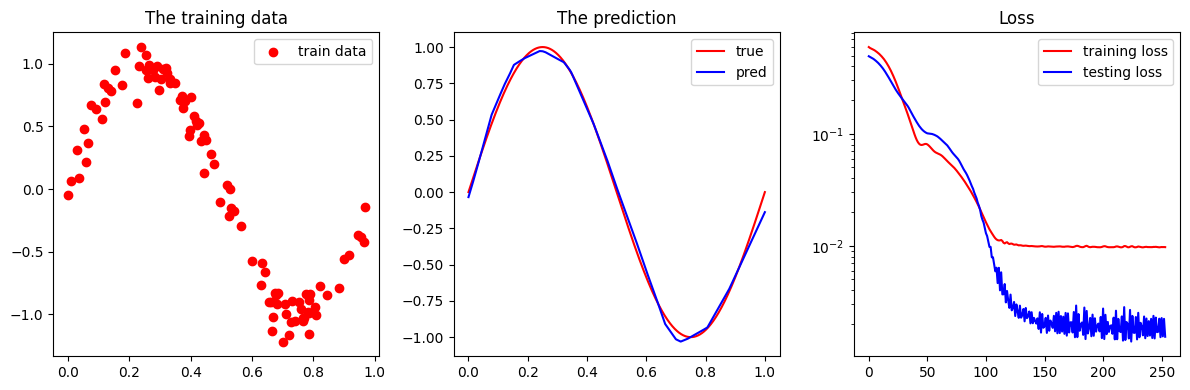

In [28]:
import matplotlib.pyplot as plt

y_pred = model(x_test).detach().numpy()
#
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# First subplot
axes[0].scatter(x_train, y_train, label="train data", color="r")
axes[0].set_title("The training data")
axes[0].legend()
#
# Second subplot
axes[1].plot(x_test, y_test, label="true", color="r")
axes[1].plot(x_test, y_pred, label="pred", color="b")
axes[1].set_title("The prediction")
axes[1].legend()
#
# Third subplot
axes[2].semilogy(loss_train, label="training loss", color="r")
axes[2].semilogy(loss_test, label="testing loss", color="b")
axes[2].set_title("Loss")
axes[2].legend()
plt.tight_layout()
plt.show()

## (8) Summary

Epoch [100/5000], Loss_train: 0.0068, Loss_test: 0.0029, lr: 0.001
Epoch [200/5000], Loss_train: 0.0000, Loss_test: 0.0023, lr: 0.001
Epoch [300/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.001
Epoch [400/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.001
Epoch [500/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.001
Epoch [600/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.001
Epoch [700/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.001
Epoch [800/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.001
Epoch [900/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.001
Epoch [1000/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.0005
Epoch [1100/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.0005
Epoch [1200/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.0005
Epoch [1300/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.0005
Epoch [1400/5000], Loss_train: 0.0000, Loss_test: 0.0017, lr: 0.0005
Epoch [1500/5000], Loss_train: 0.0000, Loss_test: 0.

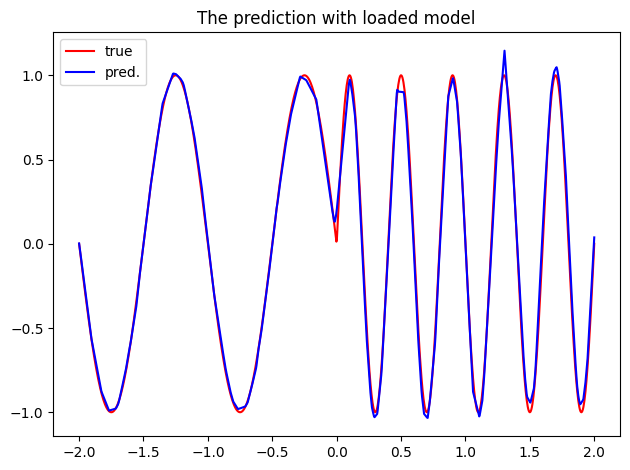

In [38]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

torch.manual_seed(1234)

########################## Step 1: Define the Neural Network
class SelfNN(nn.Module):

    def __init__(self, arch:list, activation=nn.ReLU()):
        super(SelfNN, self).__init__()
        ##
        self.nn_model = nn.Sequential()
        input_size = arch[0]
        #
        for hidden_size in arch[1:-1]:
            self.nn_model.append(nn.Linear(input_size, hidden_size))
            self.nn_model.append(activation)
            input_size = hidden_size
        #
        self.nn_model.append(nn.Linear(hidden_size, arch[-1]))

    def forward(self, x):
        '''
        Input:
            x: size(batch_size, x_size)
        Output:
            y: size(batch_size, out_size)
        '''
        y = self.nn_model(x)

        return y

########################## Step 2: load data
with h5py.File('regression_1d.h5', 'r') as f:
    x_test = torch.tensor(np.array(f['x_test']))
    y_test = torch.tensor(np.array(f['y_test']))
    x_train = torch.tensor(np.array(f['x_train']))
    y_train = torch.tensor(np.array(f['y_train']))

########################## Create DataLoader for Mini-Batch Training
class MyDataset(Dataset):

    def __init__(self, x, y):
        self.x = x.reshape(-1, 1)
        self.y = y.reshape(-1, 1)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.x.shape[0]

dataloader = DataLoader(MyDataset(x_train, y_train), batch_size=100, shuffle=True)

########################## Step 3: Initialize Model, Loss Function, and Optimizer
model = SelfNN(arch=[1, 60, 60, 60, 60, 1], activation=nn.ReLU())
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.5)

########################## Step 4: Train the Model
num_epochs = 5000
loss_train = []
loss_test = []
# Setting for early stop
best_loss = float('inf')
patience = 1000
counter = 0
for epoch in range(num_epochs):
    loss_sum = 0.
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()   # Clear gradients
        outputs = model(batch_x)  # Forward pass
        loss = criterion(outputs, batch_y)  # Compute loss
        # Checking the condition of early stopping
        if loss.item() < best_loss:
            best_loss = loss.item()
            counter = 0
        else:
            counter += 1
        if counter >= patience:
            break
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        loss_sum += loss.item()
    loss_train.append(loss_sum/len(dataloader))
    #
    scheduler.step()  # Adjust learning rate
    #
    with torch.no_grad():
        loss = criterion(model(x_test), y_test)
        loss_test.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss_train: {loss_train[-1]:.4f}, Loss_test: {loss_test[-1]:.4f}, lr: {scheduler.optimizer.param_groups[0]["lr"]}')

##########################  Step 5: Save the Model
torch.save(model, 'model_all.pth')

##########################  Step 6: Load the Model for Testing
loaded_model = torch.load('model_all.pth', weights_only=False)
loaded_model.eval()  # Set to evaluation mode

########################## Step 7: Test the Model
y_pred = loaded_model(x_test).detach().numpy()  # Make predictions
#
plt.figure()
plt.plot(x_test, y_test, label="true", color="r")
plt.plot(x_test, y_pred, label="pred.", color="b")
plt.title("The prediction with loaded model")
plt.legend()
plt.tight_layout()
plt.show()

## Exercise: Approximating a Function $f(x_1, x_2)$ using DNN

You are given a dataset where a function $f(x_1, x_2)$ is sampled in the domain $[-1,1]^2$. The dataset consists of:
- **Training data**: 2500 sampled points with corresponding function values (with noise).
- **Testing data**: Function values computed on a $100 \times 100$ mesh grid.

Your **task** is to:
- **Load the dataset** from an h5py file.
- **Build a suitable DNN model** with appropriate architecture, activation functions, and training settings (learning rate, batch size, epochs, etc.).
- **Train the DNN model** and **save the trained weights**.
- **Make predictions** using the trained model on the testing dataset and **evaluate the accuracy** using Mean Squared Error (MSE).
- **Plot the predicted function** and ground truth using ```matplotlib```.

**Instructions:**
- The dataset is stored in an HDF5 (```regression_2d.h5```) file.
- The training data is stored as:
    - ```x_train```: shape (2500,2), contains $(x_1,x_2)$ pairs.
	- ```y_train```: shape (2500,1), contains the corresponding noisy function values.
- The testing data is stored as:
	- ```x_test```: shape (10000,2), contains 100×100 mesh grid points.
	- ```y_test```: shape (10000,1), contains the corresponding function values.

<KeysViewHDF5 ['x_test', 'x_train', 'y_test', 'y_train']>


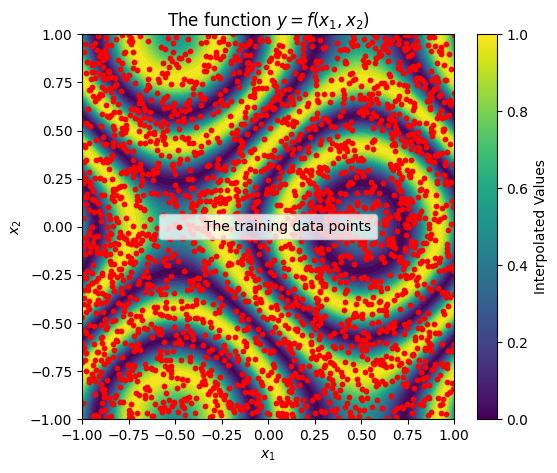

In [31]:
import numpy as np
import h5py
import torch
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
np.random.seed(1234)
#
with h5py.File('regression_2d.h5', 'r') as f:
    print(f.keys())
    x_test = torch.tensor(np.array(f['x_test']))
    y_test = torch.tensor(np.array(f['y_test']))
    x_train = torch.tensor(np.array(f['x_train']))
    y_train = torch.tensor(np.array(f['y_train']))

# Plot the function
grid_x, grid_y = np.mgrid[-1:1:200j, -1:1:200j]  # High-resolution grid
grid_z = griddata((x_test[...,0], x_test[...,1]), y_test[...,0], (grid_x, grid_y), method='cubic')  # Cubic interpolation ['nearest', 'linear', 'cubic']
#
plt.figure(figsize=(6,5))
plt.contourf(grid_x, grid_y, grid_z, levels=30, cmap="viridis")  # Filled contour plot
plt.scatter(x_train[...,0], x_train[...,1], color="red", marker="o", s=10, label="The training data points")  # Show original data points
plt.colorbar(label="Interpolated Values")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"The function $y=f(x_1, x_2)$")
plt.legend()
plt.show()

<KeysViewHDF5 ['x_test', 'x_train', 'y_test', 'y_train']>
Epoch [100/5000], Loss_train: 0.1836, Loss_test: 0.1847, lr: 0.001
Epoch [200/5000], Loss_train: 0.0337, Loss_test: 0.0334, lr: 0.001
Epoch [300/5000], Loss_train: 0.0270, Loss_test: 0.0290, lr: 0.001
Epoch [400/5000], Loss_train: 0.0203, Loss_test: 0.0265, lr: 0.001
Epoch [500/5000], Loss_train: 0.0158, Loss_test: 0.0160, lr: 0.001
Epoch [600/5000], Loss_train: 0.0153, Loss_test: 0.0169, lr: 0.001
Epoch [700/5000], Loss_train: 0.0224, Loss_test: 0.0175, lr: 0.001
Epoch [800/5000], Loss_train: 0.0150, Loss_test: 0.0152, lr: 0.001
Epoch [900/5000], Loss_train: 0.0134, Loss_test: 0.0123, lr: 0.001
Epoch [1000/5000], Loss_train: 0.0145, Loss_test: 0.0151, lr: 0.0005
Epoch [1100/5000], Loss_train: 0.0107, Loss_test: 0.0115, lr: 0.0005
Epoch [1200/5000], Loss_train: 0.0104, Loss_test: 0.0104, lr: 0.0005
Epoch [1300/5000], Loss_train: 0.0099, Loss_test: 0.0098, lr: 0.0005
Epoch [1400/5000], Loss_train: 0.0000, Loss_test: 0.0101, lr: 0

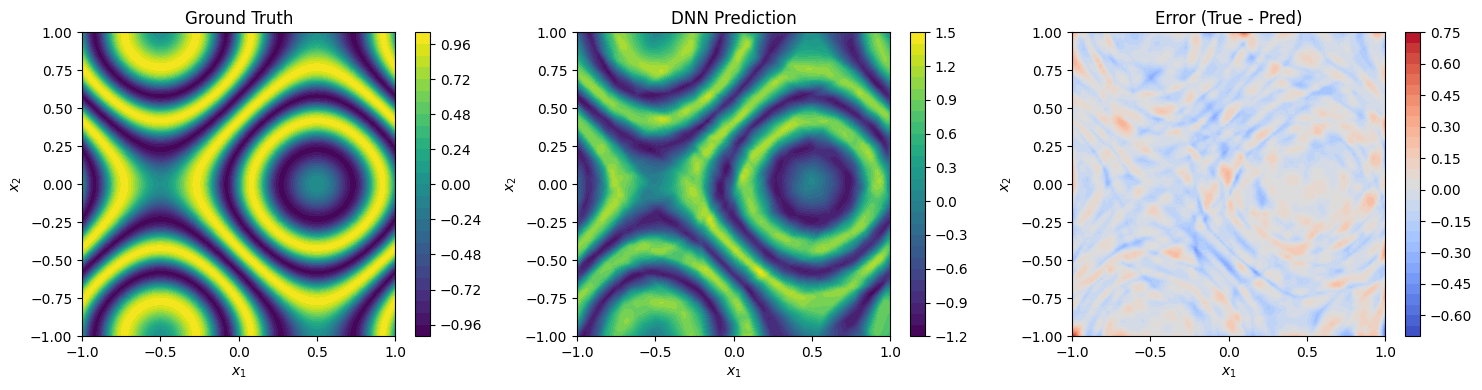

Final Test MSE: 0.010094


In [40]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

torch.manual_seed(1234)

########################## Step 1: Define the Neural Network
class SelfNN(nn.Module):

    def __init__(self, arch:list, activation=nn.ReLU()):
        super(SelfNN, self).__init__()
        ##
        self.nn_model = nn.Sequential()
        input_size = arch[0]
        #
        for hidden_size in arch[1:-1]:
            self.nn_model.append(nn.Linear(input_size, hidden_size))
            self.nn_model.append(activation)
            input_size = hidden_size
        #
        self.nn_model.append(nn.Linear(hidden_size, arch[-1]))

    def forward(self, x):
        '''
        Input:
            x: size(batch_size, x_size)
        Output:
            y: size(batch_size, out_size)
        '''
        y = self.nn_model(x)

        return y

########################## Step 2: load data
with h5py.File('regression_2d.h5', 'r') as f:
    print(f.keys())
    x_test = torch.tensor(np.array(f['x_test']))
    y_test = torch.tensor(np.array(f['y_test']))
    x_train = torch.tensor(np.array(f['x_train']))
    y_train = torch.tensor(np.array(f['y_train']))

########################## Create DataLoader for Mini-Batch Training
class MyDataset(Dataset):

    def __init__(self, x, y):
        self.x = x.reshape(-1, 2) # Now is shape (n_samples, 2), don't flatten to a single column
        self.y = y.reshape(-1, 1)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.x.shape[0]

dataloader = DataLoader(MyDataset(x_train, y_train), batch_size=100, shuffle=True)

########################## Step 3: Initialize Model, Loss Function, and Optimizer
model = SelfNN(arch=[2, 60, 60, 60, 60, 1], activation=nn.ReLU()) # now have 2 input features
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.5)

########################## Step 4: Train the Model
num_epochs = 5000
loss_train = []
loss_test = []
# Setting for early stop
best_loss = float('inf')
patience = 4000
counter = 0
for epoch in range(num_epochs):
    loss_sum = 0.
    for batch_x, batch_y in dataloader:
        optimizer.zero_grad()   # Clear gradients
        outputs = model(batch_x)  # Forward pass
        loss = criterion(outputs, batch_y)  # Compute loss
        # Checking the condition of early stopping
        if loss.item() < best_loss:
            best_loss = loss.item()
            counter = 0
        else:
            counter += 1
        if counter >= patience:
            break
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        loss_sum += loss.item()
    loss_train.append(loss_sum/len(dataloader))
    #
    scheduler.step()  # Adjust learning rate
    #
    with torch.no_grad():
        loss = criterion(model(x_test), y_test)
        loss_test.append(loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss_train: {loss_train[-1]:.4f}, Loss_test: {loss_test[-1]:.4f}, lr: {scheduler.optimizer.param_groups[0]["lr"]}')

##########################  Step 5: Save the Model
torch.save(model, 'model_all.pth')

##########################  Step 6: Load the Model for Testing
loaded_model = torch.load('model_all.pth', weights_only=False)
loaded_model.eval()  # Set to evaluation mode

########################## Step 7: Test the Model
from scipy.interpolate import griddata

y_pred = loaded_model(x_test).detach().numpy()

# Create high-resolution grid for interpolation
grid_x, grid_y = np.mgrid[-1:1:200j, -1:1:200j]

# Interpolate true values onto grid
grid_z_true = griddata((x_test[...,0].numpy(), x_test[...,1].numpy()),
                        y_test[...,0].numpy(),
                        (grid_x, grid_y), method='cubic')

# Interpolate predicted values onto grid
grid_z_pred = griddata((x_test[...,0].numpy(), x_test[...,1].numpy()),
                        y_pred[...,0],
                        (grid_x, grid_y), method='cubic')

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# True function
c1 = axes[0].contourf(grid_x, grid_y, grid_z_true, levels=30, cmap="viridis")
axes[0].set_xlabel(r"$x_1$")
axes[0].set_ylabel(r"$x_2$")
axes[0].set_title("Ground Truth")
plt.colorbar(c1, ax=axes[0])

# Predicted function
c2 = axes[1].contourf(grid_x, grid_y, grid_z_pred, levels=30, cmap="viridis")
axes[1].set_xlabel(r"$x_1$")
axes[1].set_ylabel(r"$x_2$")
axes[1].set_title("DNN Prediction")
plt.colorbar(c2, ax=axes[1])

# Error (difference)
grid_z_error = grid_z_true - grid_z_pred
c3 = axes[2].contourf(grid_x, grid_y, grid_z_error, levels=30, cmap="coolwarm")
axes[2].set_xlabel(r"$x_1$")
axes[2].set_ylabel(r"$x_2$")
axes[2].set_title("Error (True - Pred)")
plt.colorbar(c3, ax=axes[2])

plt.tight_layout()
plt.show()

# Print final MSE
print(f"Final Test MSE: {loss_test[-1]:.6f}")